In [318]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [319]:
path = 'bank-additional-full'

In [320]:
def read_file(path):
    df = pd.read_csv(path + '.csv', sep=';') 
    return df

In [321]:
def filter_duplicated_rows(df):
    df = df.drop_duplicates(keep='first')
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [322]:
def display_values_of_each_variable(df):
    for i in df.columns:
        print(i)
        print(df[i].unique())
        print('--'*28)

In [323]:
def num_features(df):
    numerical_cols = list(df.select_dtypes(exclude=['object']))
    return numerical_cols

In [324]:
def cat_features(df):
    category_cols = list(df.select_dtypes(include=['object']))
    return category_cols

In [325]:
def visualize_freq_cat_features(df, category_cols):
    for col in category_cols:
        plt.figure(figsize=(10,4))
        sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
        plt.title(col)
        plt.tight_layout()

In [326]:
def visualize_cat_features_y(df, category_cols):
    for col in category_cols:
        plt.figure(figsize=(10,4))
        #Returns counts of unique values for each outcome for each feature.
        pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
        neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
        all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
        #Counts of how often each outcome was recorded.
        freq_pos = (df.y.values == 'yes').sum()
        freq_neg = (df.y.values == 'no').sum()
    
        pos_counts = pos_counts.to_dict()
        neg_counts = neg_counts.to_dict()
    
        all_index = list(all_counts)
        all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

        sns.barplot(all_counts, all_index)
        plt.title(col)
        plt.tight_layout()

In [327]:
def replace_unknown_and_abnormal_values(df):
    df.default.replace('unknown','no',inplace=True)
    df['default'] = df.default.replace('unknown',df.default.mode([0]))
    
    df.housing.replace('unknown',df.housing.mode()[0],inplace=True)
    
    df['loan'] = df.default.replace('unknown',df.loan.mode()[0])
    
    df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
    df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
    df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
    df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
    df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
    df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
    df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
    df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'
    
    df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])
    
    return df

In [328]:
def encode_target_variable(df):
    df['y'].replace({'no':0,'yes':1},inplace=True)
    return df

In [329]:
def cat_encoder(df, category_cols):
    labelenc = LabelEncoder()
    df[category_cols] = df[category_cols].apply(LabelEncoder().fit_transform)
    return df

In [330]:
def correlation(df):
    fig, ax = plt.subplots(figsize=(12,12))
    return sns.heatmap(df.corr(), annot=True,cmap='viridis',linewidths=0.5,ax=ax)

In [331]:
'''
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = df,
                     hue = 'y')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
# Annotation
plt.show()
'''

"\nduration_campaign = sns.scatterplot(x='duration', y='campaign',data = df,\n                     hue = 'y')\n\nplt.axis([0,65,0,65])\nplt.ylabel('Number of Calls')\nplt.xlabel('Duration of Calls (Minutes)')\nplt.title('The Relationship between the Number and Duration of Calls')\n# Annotation\nplt.show()\n"

In [332]:
# drop rows where call duration was less than 10 seconds
#dropped 290 rows
#[df.duration < 10/60]
#df = df.drop(df[df.duration < 10/60].index, axis = 0, inplace = False)

In [334]:
df = read_file(path)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [335]:
df.shape

(41188, 21)

In [336]:
df = filter_duplicated_rows(df)
df.shape

(41176, 21)

In [337]:
display_values_of_each_variable(df)

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
--------------------------------------------------------
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
--------------------------------------------------------
marital
['married' 'single' 'divorced' 'unknown']
--------------------------------------------------------
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
--------------------------------------------------------
default
['no' 'unknown' 'yes']
--------------------------------------------------------
housing
['no' 'yes' 'unknown']
--------------------------------------------------------
loan
['no' 'yes' 'unknow

In [338]:
num_features(df)

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [339]:
cat_features(df)

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

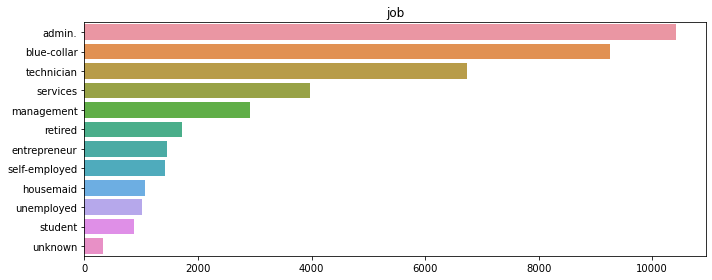

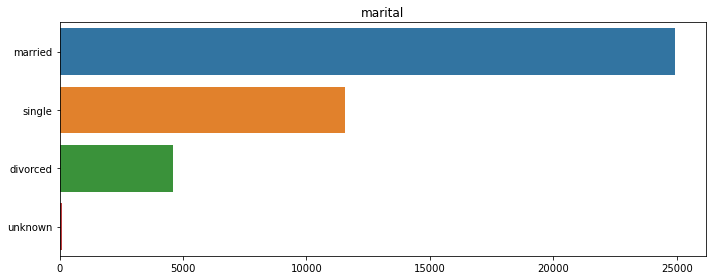

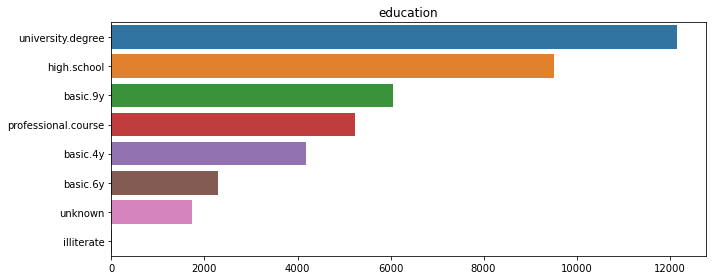

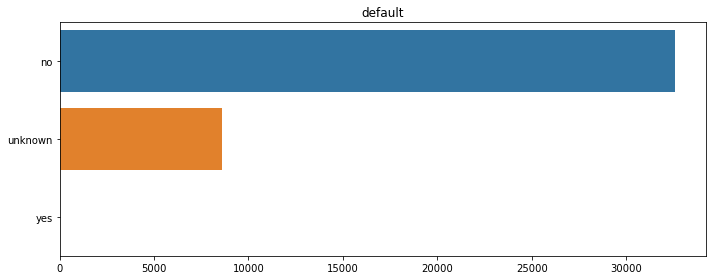

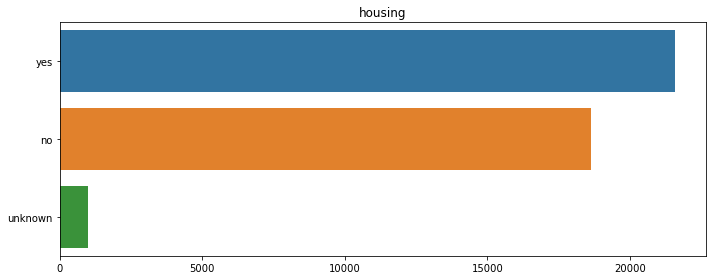

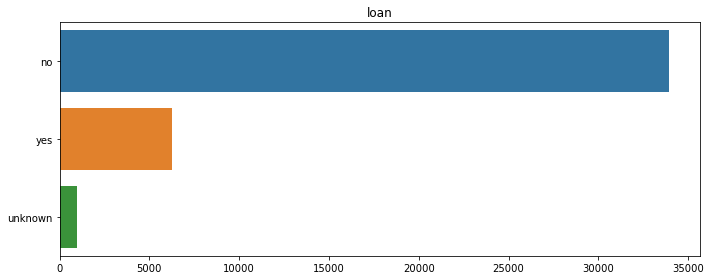

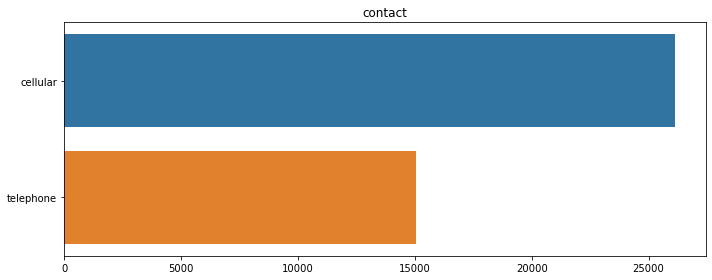

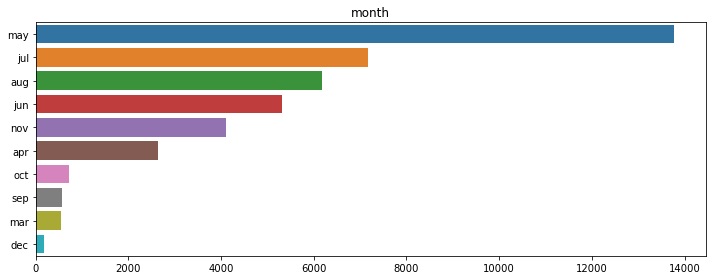

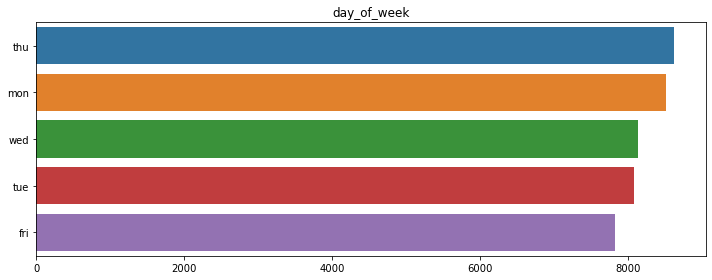

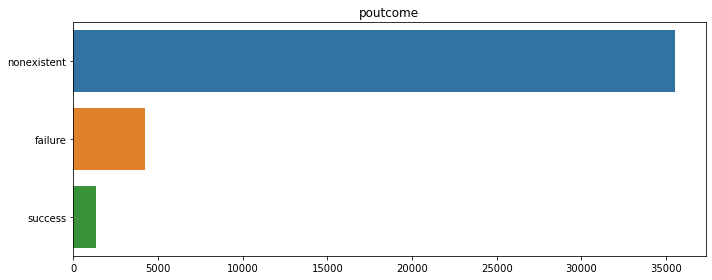

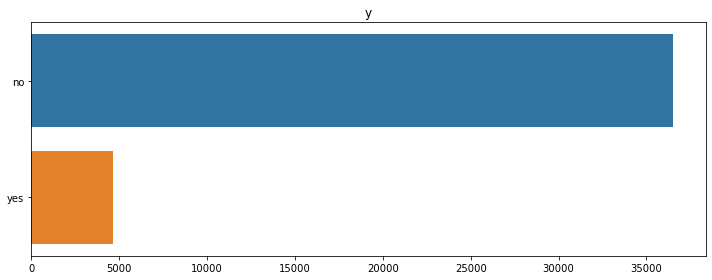

In [340]:
visualize_freq_cat_features(df, cat_features(df))

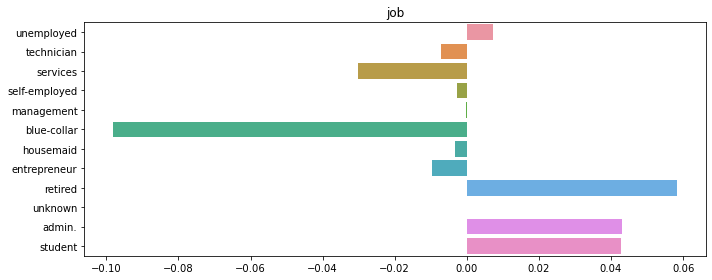

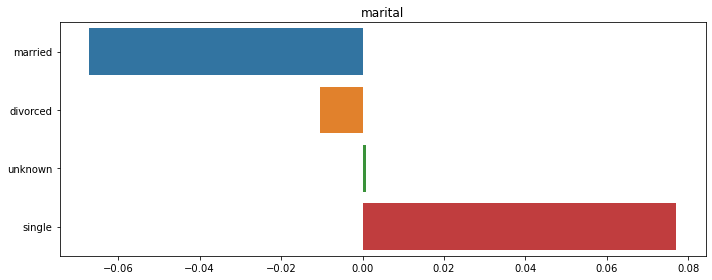

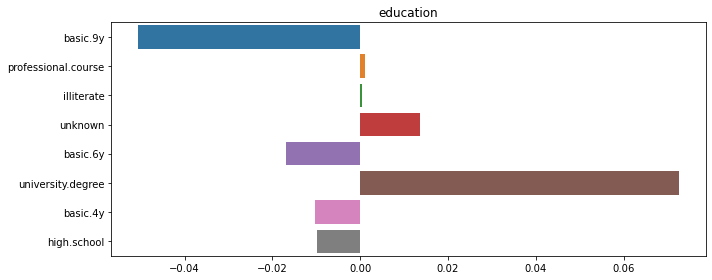

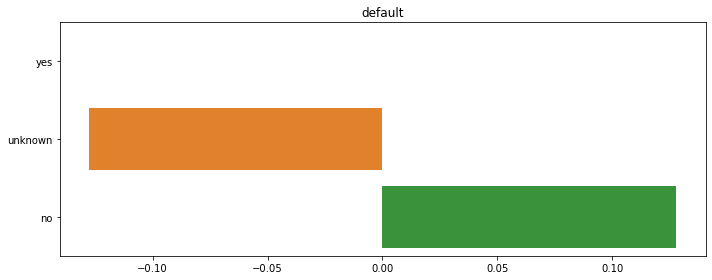

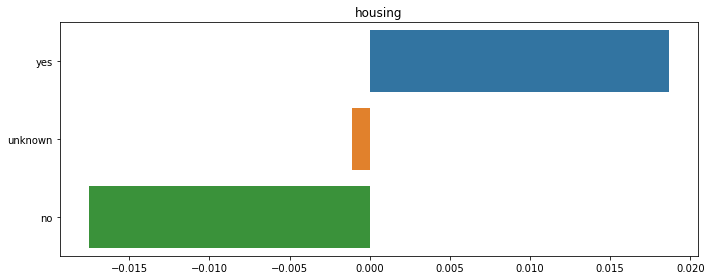

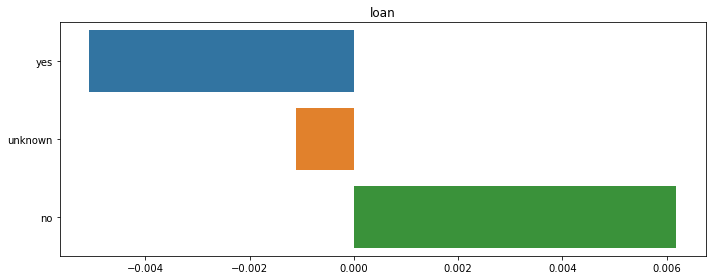

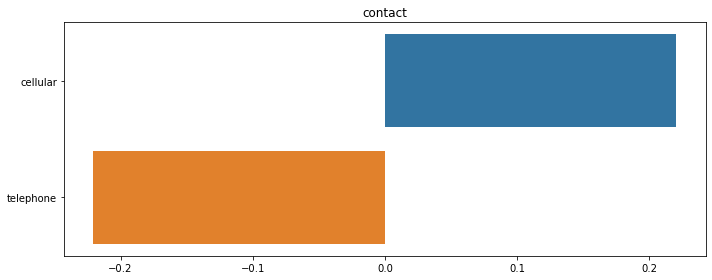

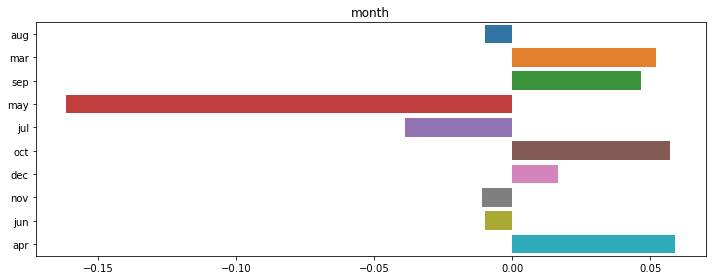

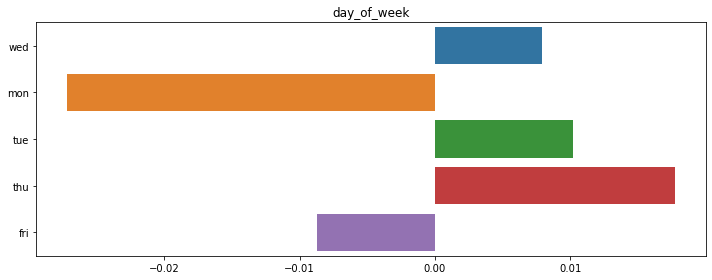

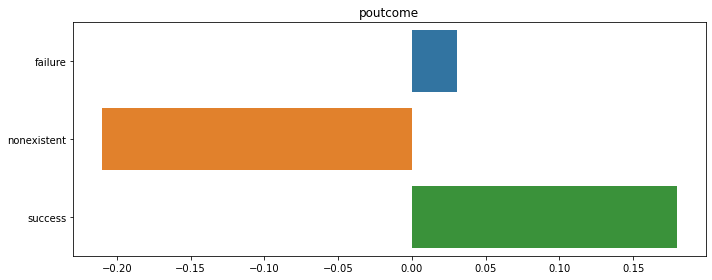

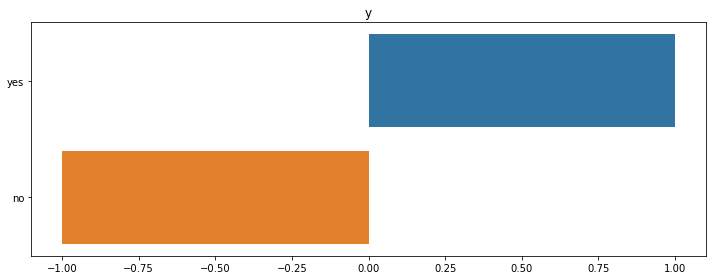

In [341]:
visualize_cat_features_y(df, cat_features(df))

In [342]:
df = replace_unknown_and_abnormal_values(df)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,no,telephone,may,mon,...,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [343]:
df = encode_target_variable(df)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,no,telephone,may,mon,...,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


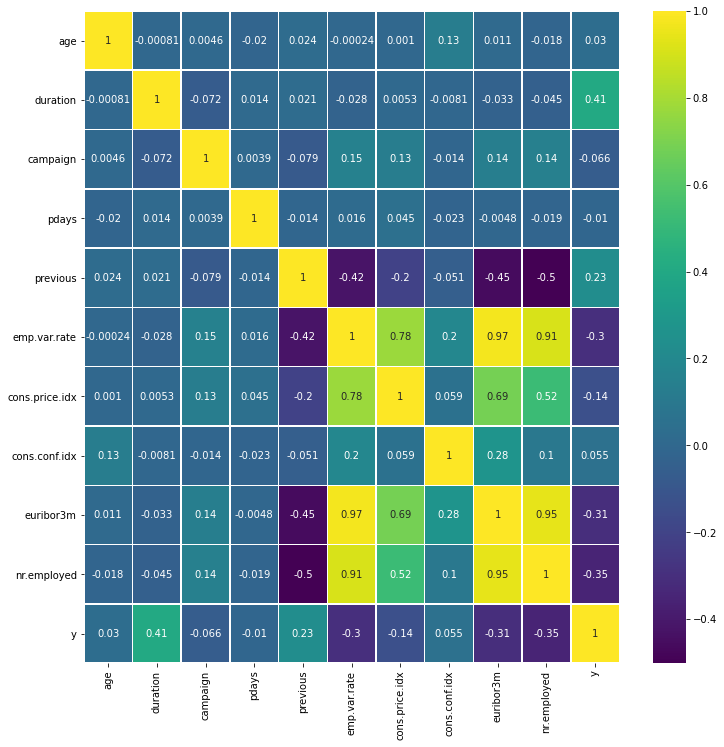

In [344]:
correlation(df)

### Modeling

In [345]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [346]:
def generate_auc_roc_curve(clf, X_test, Y_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(Y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc=4)
    plt.show()
    pass

In [347]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [348]:
df = cat_encoder(df, cat_features(df))
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,6.014521,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,...,1,6.014521,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,6.014521,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,6.014521,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,0,1,6,1,...,1,6.014521,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,...,1,6.014521,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,6.014521,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,1,0,0,7,0,...,2,6.014521,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,6.014521,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [349]:
X = df.drop(['y','duration'], 1)
y = df['y']

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [351]:
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: Lin

[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.901, total=   4.6s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.901, total=   4.1s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.899, total=   5.5s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.903, total=   4.9s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.900, total=   5.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=100, penalty=l2, solver=lbfgs, score=0.893, total=   0.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=100, penalty=l2, solver=lbfgs, score=0.892, total=   0.4s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=100, penalty=l2, solver=lbfgs, score=0.894, total=   0.3s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=100, penalty=l2, solver=lbfgs, score=0.893, total=   0.3s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=100, penalty=l2, solver=lbfgs, score=0.890, total=   0.4s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=sag, score=0.889, total=   1.5s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=sag, score=0.889, total=   2.2s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=sag, score=0.889, total=   2.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=sag, score=0.888, total=   2.6s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=sag, score=0.888, total=   3.3s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=saga, score=0.889, total=   3.3s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=saga, score=0.889, total=   3.1s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=saga, score=0.889, total=   3.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=saga, score=0.888, total=   3.1s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=saga, score=0.888, total=   2.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.901, total=   5.5s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.901, total=   4.2s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.899, total=   4.4s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.903, total=   2.7s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.900, total=   4.2s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.898, total=   0.8s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.901, total=   0.8s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.897, total=   0.8s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.901, total=   0.7s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.895, total=   0.8s
[CV] C=0.01, max_iter=200, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=sag, score=0.889, total=   2.5s
[CV] C=0.01, max_iter=200, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=sag, score=0.889, total=   2.5s
[CV] C=0.01, max_iter=200, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=sag, score=0.889, total=   2.6s
[CV] C=0.01, max_iter=200, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=sag, score=0.888, total=   2.7s
[CV] C=0.01, max_iter=200, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=sag, score=0.888, total=   2.3s
[CV] C=0.01, max_iter=200, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=saga, score=0.889, total=   2.4s
[CV] C=0.01, max_iter=200, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=saga, score=0.889, total=   2.6s
[CV] C=0.01, max_iter=200, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=saga, score=0.889, total=   2.4s
[CV] C=0.01, max_iter=200, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=saga, score=0.888, total=   2.9s
[CV] C=0.01, max_iter=200, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=saga, score=0.888, total=   2.3s
[CV] C=0.01, max_iter=300, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=300, penalty=l2, solver=newton-cg, score=0.901, total=   4.0s
[CV] C=0.01, max_iter=300, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=300, penalty=l2, solver=newton-cg, score=0.901, total=   4.2s
[CV] C=0.01, max_iter=300, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=300, penalty=l2, solver=newton-cg, score=0.899, total=   4.3s
[CV] C=0.01, max_iter=300, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=300, penalty=l2, solver=newton-cg, score=0.903, total=   2.9s
[CV] C=0.01, max_iter=300, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=300, penalty=l2, solver=newton-cg, score=0.900, total=   4.4s
[CV] C=0.01, max_iter=300, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=300, penalty=l2, solver=lbfgs, score=0.900, total=   1.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=lbfgs, score=0.901, total=   1.0s
[CV] C=0.01, max_iter=300, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=300, penalty=l2, solver=lbfgs, score=0.898, total=   1.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=300, penalty=l2, solver=lbfgs, score=0.904, total=   1.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=300, penalty=l2, solver=lbfgs, score=0.896, total=   1.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l2, solver=sag, score=0.889, total=   3.4s
[CV] C=0.01, max_iter=300, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l2, solver=sag, score=0.889, total=   3.6s
[CV] C=0.01, max_iter=300, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l2, solver=sag, score=0.889, total=   3.8s
[CV] C=0.01, max_iter=300, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l2, solver=sag, score=0.888, total=   3.3s
[CV] C=0.01, max_iter=300, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l2, solver=sag, score=0.888, total=   3.3s
[CV] C=0.01, max_iter=300, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.889, total=   3.8s
[CV] C=0.01, max_iter=300, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.889, total=   4.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.889, total=   4.6s
[CV] C=0.01, max_iter=300, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.888, total=   4.4s
[CV] C=0.01, max_iter=300, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.888, total=   6.5s
[CV] C=0.01, max_iter=400, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=400, penalty=l2, solver=newton-cg, score=0.901, total=   5.3s
[CV] C=0.01, max_iter=400, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=400, penalty=l2, solver=newton-cg, score=0.901, total=   4.2s
[CV] C=0.01, max_iter=400, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=400, penalty=l2, solver=newton-cg, score=0.899, total=   4.2s
[CV] C=0.01, max_iter=400, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=400, penalty=l2, solver=newton-cg, score=0.903, total=   3.0s
[CV] C=0.01, max_iter=400, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=400, penalty=l2, solver=newton-cg, score=0.900, total=   5.3s
[CV] C=0.01, max_iter=400, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=400, penalty=l2, solver=lbfgs, score=0.900, total=   1.5s
[CV] C=0.01, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=lbfgs, score=0.901, total=   1.0s
[CV] C=0.01, max_iter=400, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=400, penalty=l2, solver=lbfgs, score=0.899, total=   1.5s
[CV] C=0.01, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=lbfgs, score=0.902, total=   1.5s
[CV] C=0.01, max_iter=400, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=400, penalty=l2, solver=lbfgs, score=0.897, total=   1.6s
[CV] C=0.01, max_iter=400, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=400, penalty=l2, solver=sag, score=0.889, total=   5.1s
[CV] C=0.01, max_iter=400, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=400, penalty=l2, solver=sag, score=0.889, total=   4.4s
[CV] C=0.01, max_iter=400, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=400, penalty=l2, solver=sag, score=0.889, total=   4.4s
[CV] C=0.01, max_iter=400, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=400, penalty=l2, solver=sag, score=0.888, total=   4.7s
[CV] C=0.01, max_iter=400, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=400, penalty=l2, solver=sag, score=0.888, total=   4.7s
[CV] C=0.01, max_iter=400, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=400, penalty=l2, solver=saga, score=0.889, total=   6.0s
[CV] C=0.01, max_iter=400, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=400, penalty=l2, solver=saga, score=0.889, total=   8.4s
[CV] C=0.01, max_iter=400, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=400, penalty=l2, solver=saga, score=0.889, total=   4.8s
[CV] C=0.01, max_iter=400, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=400, penalty=l2, solver=saga, score=0.888, total=   4.8s
[CV] C=0.01, max_iter=400, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=400, penalty=l2, solver=saga, score=0.888, total=   5.3s
[CV] C=0.01, max_iter=500, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=500, penalty=l2, solver=newton-cg, score=0.901, total=   5.1s
[CV] C=0.01, max_iter=500, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=500, penalty=l2, solver=newton-cg, score=0.901, total=   4.2s
[CV] C=0.01, max_iter=500, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=500, penalty=l2, solver=newton-cg, score=0.899, total=   4.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=500, penalty=l2, solver=newton-cg, score=0.903, total=   2.7s
[CV] C=0.01, max_iter=500, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=500, penalty=l2, solver=newton-cg, score=0.900, total=   4.4s
[CV] C=0.01, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.901, total=   1.8s
[CV] C=0.01, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.901, total=   0.9s
[CV] C=0.01, max_iter=500, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.898, total=   1.9s
[CV] C=0.01, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.902, total=   1.6s
[CV] C=0.01, max_iter=500, penalty=l2, solver=lbfgs ..................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.899, total=   1.8s
[CV] C=0.01, max_iter=500, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=500, penalty=l2, solver=sag, score=0.889, total=   6.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=500, penalty=l2, solver=sag, score=0.889, total=   7.2s
[CV] C=0.01, max_iter=500, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=500, penalty=l2, solver=sag, score=0.889, total=   8.1s
[CV] C=0.01, max_iter=500, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=500, penalty=l2, solver=sag, score=0.888, total=   8.4s
[CV] C=0.01, max_iter=500, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=500, penalty=l2, solver=sag, score=0.888, total=   7.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=500, penalty=l2, solver=saga, score=0.889, total=   7.5s
[CV] C=0.01, max_iter=500, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=500, penalty=l2, solver=saga, score=0.889, total=   6.8s
[CV] C=0.01, max_iter=500, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=500, penalty=l2, solver=saga, score=0.889, total=   8.6s
[CV] C=0.01, max_iter=500, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=500, penalty=l2, solver=saga, score=0.888, total=   6.5s
[CV] C=0.01, max_iter=500, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=500, penalty=l2, solver=saga, score=0.888, total=   5.9s
[CV] C=0.01, max_iter=600, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=600, penalty=l2, solver=newton-cg, score=0.901, total=   4.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=600, penalty=l2, solver=newton-cg, score=0.901, total=   4.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=600, penalty=l2, solver=newton-cg, score=0.899, total=   4.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=600, penalty=l2, solver=newton-cg, score=0.903, total=   2.5s
[CV] C=0.01, max_iter=600, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=600, penalty=l2, solver=newton-cg, score=0.900, total=   4.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=lbfgs, score=0.901, total=   1.5s
[CV] C=0.01, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=lbfgs, score=0.901, total=   0.8s
[CV] C=0.01, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=lbfgs, score=0.900, total=   1.9s
[CV] C=0.01, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=lbfgs, score=0.902, total=   1.5s
[CV] C=0.01, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=lbfgs, score=0.899, total=   2.4s
[CV] C=0.01, max_iter=600, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=600, penalty=l2, solver=sag, score=0.889, total=  11.0s
[CV] C=0.01, max_iter=600, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=600, penalty=l2, solver=sag, score=0.888, total=   6.6s
[CV] C=0.01, max_iter=600, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=600, penalty=l2, solver=sag, score=0.889, total=   6.8s
[CV] C=0.01, max_iter=600, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=600, penalty=l2, solver=sag, score=0.888, total=   6.4s
[CV] C=0.01, max_iter=600, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=600, penalty=l2, solver=sag, score=0.888, total=   6.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=600, penalty=l2, solver=saga, score=0.889, total=   7.9s
[CV] C=0.01, max_iter=600, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=600, penalty=l2, solver=saga, score=0.889, total=   7.9s
[CV] C=0.01, max_iter=600, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=600, penalty=l2, solver=saga, score=0.889, total=   8.1s
[CV] C=0.01, max_iter=600, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=600, penalty=l2, solver=saga, score=0.888, total=   7.6s
[CV] C=0.01, max_iter=600, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=600, penalty=l2, solver=saga, score=0.888, total=   7.8s
[CV] C=0.01, max_iter=700, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=700, penalty=l2, solver=newton-cg, score=0.901, total=   4.3s
[CV] C=0.01, max_iter=700, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=700, penalty=l2, solver=newton-cg, score=0.901, total=   3.9s
[CV] C=0.01, max_iter=700, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=700, penalty=l2, solver=newton-cg, score=0.899, total=   4.1s
[CV] C=0.01, max_iter=700, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=700, penalty=l2, solver=newton-cg, score=0.903, total=   2.9s
[CV] C=0.01, max_iter=700, penalty=l2, solver=newton-cg ..............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.01, max_iter=700, penalty=l2, solver=newton-cg, score=0.900, total=   4.7s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.901, total=   1.7s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.901, total=   0.9s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.900, total=   2.3s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.902, total=   1.6s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.899, total=   2.2s
[CV] C=0.01, max_iter=700, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=700, penalty=l2, solver=sag, score=0.889, total=   8.0s
[CV] C=0.01, max_iter=700, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=700, penalty=l2, solver=sag, score=0.889, total=   8.5s
[CV] C=0.01, max_iter=700, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=700, penalty=l2, solver=sag, score=0.889, total=   8.4s
[CV] C=0.01, max_iter=700, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=700, penalty=l2, solver=sag, score=0.888, total=   8.5s
[CV] C=0.01, max_iter=700, penalty=l2, solver=sag ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=700, penalty=l2, solver=sag, score=0.888, total=   7.5s
[CV] C=0.01, max_iter=700, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=700, penalty=l2, solver=saga, score=0.889, total=   8.9s
[CV] C=0.01, max_iter=700, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=700, penalty=l2, solver=saga, score=0.889, total=   8.3s
[CV] C=0.01, max_iter=700, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=700, penalty=l2, solver=saga, score=0.889, total=   9.5s
[CV] C=0.01, max_iter=700, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=700, penalty=l2, solver=saga, score=0.888, total=  11.7s
[CV] C=0.01, max_iter=700, penalty=l2, solver=saga ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=700, penalty=l2, solver=saga, score=0.888, total=  11.2s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.899, total=   3.6s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.899, total=   3.4s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.898, total=   5.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.904, total=   5.7s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.900, total=   3.7s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=100, penalty=l2, solver=lbfgs, score=0.895, total=   0.6s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=100, penalty=l2, solver=lbfgs, score=0.892, total=   0.6s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=100, penalty=l2, solver=lbfgs, score=0.893, total=   0.4s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=100, penalty=l2, solver=lbfgs, score=0.892, total=   0.4s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=100, penalty=l2, solver=lbfgs, score=0.893, total=   0.5s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=sag, score=0.889, total=   1.6s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=sag, score=0.889, total=   1.3s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=sag, score=0.889, total=   1.5s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=sag, score=0.888, total=   1.9s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=sag, score=0.888, total=   1.8s
[CV] C=0.1, max_iter=100, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=saga, score=0.889, total=   1.8s
[CV] C=0.1, max_iter=100, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=saga, score=0.889, total=   1.4s
[CV] C=0.1, max_iter=100, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=saga, score=0.889, total=   1.8s
[CV] C=0.1, max_iter=100, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=saga, score=0.888, total=   1.7s
[CV] C=0.1, max_iter=100, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=saga, score=0.888, total=   2.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.899, total=   4.7s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.899, total=   4.7s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.898, total=   4.9s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.904, total=   4.4s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.900, total=   4.7s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.901, total=   0.9s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.896, total=   0.8s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.898, total=   0.9s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.901, total=   1.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.895, total=   1.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=sag, score=0.889, total=   3.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=sag, score=0.889, total=   2.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=sag, score=0.889, total=   2.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=sag, score=0.888, total=   2.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=sag, score=0.888, total=   2.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=saga, score=0.889, total=   2.2s
[CV] C=0.1, max_iter=200, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=saga, score=0.889, total=   2.2s
[CV] C=0.1, max_iter=200, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=saga, score=0.889, total=   2.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=saga, score=0.888, total=   2.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=saga, score=0.888, total=   2.2s
[CV] C=0.1, max_iter=300, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=300, penalty=l2, solver=newton-cg, score=0.899, total=   2.4s
[CV] C=0.1, max_iter=300, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=0.1, max_iter=300, penalty=l2, solver=newton-cg, score=0.899, total=   2.7s
[CV] C=0.1, max_iter=300, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=300, penalty=l2, solver=newton-cg, score=0.898, total=   2.7s
[CV] C=0.1, max_iter=300, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=300, penalty=l2, solver=newton-cg, score=0.904, total=   3.4s
[CV] C=0.1, max_iter=300, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=300, penalty=l2, solver=newton-cg, score=0.900, total=   3.0s
[CV] C=0.1, max_iter=300, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=300, penalty=l2, solver=lbfgs, score=0.899, total=   1.0s
[CV] C=0.1, max_iter=300, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=300, penalty=l2, solver=lbfgs, score=0.896, total=   0.9s
[CV] C=0.1, max_iter=300, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=300, penalty=l2, solver=lbfgs, score=0.898, total=   0.9s
[CV] C=0.1, max_iter=300, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=300, penalty=l2, solver=lbfgs, score=0.902, total=   1.0s
[CV] C=0.1, max_iter=300, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=300, penalty=l2, solver=lbfgs, score=0.898, total=   0.9s
[CV] C=0.1, max_iter=300, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l2, solver=sag, score=0.889, total=   2.9s
[CV] C=0.1, max_iter=300, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l2, solver=sag, score=0.889, total=   3.0s
[CV] C=0.1, max_iter=300, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l2, solver=sag, score=0.889, total=   3.0s
[CV] C=0.1, max_iter=300, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l2, solver=sag, score=0.888, total=   3.0s
[CV] C=0.1, max_iter=300, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l2, solver=sag, score=0.888, total=   3.0s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.889, total=   3.2s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.889, total=   3.7s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.889, total=   3.9s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.888, total=   4.3s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.888, total=   4.0s
[CV] C=0.1, max_iter=400, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=400, penalty=l2, solver=newton-cg, score=0.899, total=   2.6s
[CV] C=0.1, max_iter=400, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=0.1, max_iter=400, penalty=l2, solver=newton-cg, score=0.899, total=   2.6s
[CV] C=0.1, max_iter=400, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=400, penalty=l2, solver=newton-cg, score=0.898, total=   2.8s
[CV] C=0.1, max_iter=400, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=400, penalty=l2, solver=newton-cg, score=0.904, total=   3.5s
[CV] C=0.1, max_iter=400, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=400, penalty=l2, solver=newton-cg, score=0.900, total=   3.2s
[CV] C=0.1, max_iter=400, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=400, penalty=l2, solver=lbfgs, score=0.900, total=   1.3s
[CV] C=0.1, max_iter=400, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=400, penalty=l2, solver=lbfgs, score=0.900, total=   1.3s
[CV] C=0.1, max_iter=400, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=400, penalty=l2, solver=lbfgs, score=0.899, total=   1.4s
[CV] C=0.1, max_iter=400, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=400, penalty=l2, solver=lbfgs, score=0.904, total=   1.2s
[CV] C=0.1, max_iter=400, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=400, penalty=l2, solver=lbfgs, score=0.900, total=   1.3s
[CV] C=0.1, max_iter=400, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=400, penalty=l2, solver=sag, score=0.889, total=   4.3s
[CV] C=0.1, max_iter=400, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=400, penalty=l2, solver=sag, score=0.889, total=   4.7s
[CV] C=0.1, max_iter=400, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=400, penalty=l2, solver=sag, score=0.889, total=   4.6s
[CV] C=0.1, max_iter=400, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=400, penalty=l2, solver=sag, score=0.888, total=   4.2s
[CV] C=0.1, max_iter=400, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=400, penalty=l2, solver=sag, score=0.888, total=   4.3s
[CV] C=0.1, max_iter=400, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=400, penalty=l2, solver=saga, score=0.889, total=   4.4s
[CV] C=0.1, max_iter=400, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=400, penalty=l2, solver=saga, score=0.889, total=   4.4s
[CV] C=0.1, max_iter=400, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=400, penalty=l2, solver=saga, score=0.889, total=   4.5s
[CV] C=0.1, max_iter=400, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=400, penalty=l2, solver=saga, score=0.888, total=   4.7s
[CV] C=0.1, max_iter=400, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=400, penalty=l2, solver=saga, score=0.888, total=   4.3s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.899, total=   2.5s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.899, total=   2.6s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.898, total=   3.1s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.904, total=   3.8s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.900, total=   3.1s
[CV] C=0.1, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=lbfgs, score=0.900, total=   1.8s
[CV] C=0.1, max_iter=500, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=500, penalty=l2, solver=lbfgs, score=0.901, total=   1.6s
[CV] C=0.1, max_iter=500, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=500, penalty=l2, solver=lbfgs, score=0.899, total=   1.5s
[CV] C=0.1, max_iter=500, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=500, penalty=l2, solver=lbfgs, score=0.903, total=   1.6s
[CV] C=0.1, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=lbfgs, score=0.900, total=   2.0s
[CV] C=0.1, max_iter=500, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=500, penalty=l2, solver=sag, score=0.889, total=   6.4s
[CV] C=0.1, max_iter=500, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=500, penalty=l2, solver=sag, score=0.889, total=   5.0s
[CV] C=0.1, max_iter=500, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=500, penalty=l2, solver=sag, score=0.889, total=   5.7s
[CV] C=0.1, max_iter=500, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=500, penalty=l2, solver=sag, score=0.888, total=   7.7s
[CV] C=0.1, max_iter=500, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=500, penalty=l2, solver=sag, score=0.888, total=   6.1s
[CV] C=0.1, max_iter=500, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=500, penalty=l2, solver=saga, score=0.889, total=   6.2s
[CV] C=0.1, max_iter=500, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=500, penalty=l2, solver=saga, score=0.889, total=   5.8s
[CV] C=0.1, max_iter=500, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=500, penalty=l2, solver=saga, score=0.889, total=   6.3s
[CV] C=0.1, max_iter=500, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=500, penalty=l2, solver=saga, score=0.888, total=   6.3s
[CV] C=0.1, max_iter=500, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=500, penalty=l2, solver=saga, score=0.888, total=   6.1s
[CV] C=0.1, max_iter=600, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=600, penalty=l2, solver=newton-cg, score=0.899, total=   3.1s
[CV] C=0.1, max_iter=600, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=0.1, max_iter=600, penalty=l2, solver=newton-cg, score=0.899, total=   3.3s
[CV] C=0.1, max_iter=600, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=600, penalty=l2, solver=newton-cg, score=0.898, total=   2.9s
[CV] C=0.1, max_iter=600, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=600, penalty=l2, solver=newton-cg, score=0.904, total=   3.9s
[CV] C=0.1, max_iter=600, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=600, penalty=l2, solver=newton-cg, score=0.900, total=   3.4s
[CV] C=0.1, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=lbfgs, score=0.900, total=   2.0s
[CV] C=0.1, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=lbfgs, score=0.902, total=   2.3s
[CV] C=0.1, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=lbfgs, score=0.899, total=   2.4s
[CV] C=0.1, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=lbfgs, score=0.904, total=   2.6s
[CV] C=0.1, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=lbfgs, score=0.900, total=   2.0s
[CV] C=0.1, max_iter=600, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=600, penalty=l2, solver=sag, score=0.889, total=   8.9s
[CV] C=0.1, max_iter=600, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=600, penalty=l2, solver=sag, score=0.888, total=  12.0s
[CV] C=0.1, max_iter=600, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=600, penalty=l2, solver=sag, score=0.889, total=   8.1s
[CV] C=0.1, max_iter=600, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=600, penalty=l2, solver=sag, score=0.888, total=   7.7s
[CV] C=0.1, max_iter=600, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=600, penalty=l2, solver=sag, score=0.888, total=   7.7s
[CV] C=0.1, max_iter=600, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=600, penalty=l2, solver=saga, score=0.889, total=   7.5s
[CV] C=0.1, max_iter=600, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=600, penalty=l2, solver=saga, score=0.889, total=   6.8s
[CV] C=0.1, max_iter=600, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=600, penalty=l2, solver=saga, score=0.889, total=   6.3s
[CV] C=0.1, max_iter=600, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=600, penalty=l2, solver=saga, score=0.888, total=   6.5s
[CV] C=0.1, max_iter=600, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=600, penalty=l2, solver=saga, score=0.888, total=   6.9s
[CV] C=0.1, max_iter=700, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=700, penalty=l2, solver=newton-cg, score=0.899, total=   2.7s
[CV] C=0.1, max_iter=700, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=0.1, max_iter=700, penalty=l2, solver=newton-cg, score=0.899, total=   2.6s
[CV] C=0.1, max_iter=700, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=700, penalty=l2, solver=newton-cg, score=0.898, total=   2.8s
[CV] C=0.1, max_iter=700, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=700, penalty=l2, solver=newton-cg, score=0.904, total=   3.7s
[CV] C=0.1, max_iter=700, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=0.1, max_iter=700, penalty=l2, solver=newton-cg, score=0.900, total=   3.1s
[CV] C=0.1, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l2, solver=lbfgs, score=0.900, total=   1.9s
[CV] C=0.1, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l2, solver=lbfgs, score=0.902, total=   1.8s
[CV] C=0.1, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l2, solver=lbfgs, score=0.899, total=   2.1s
[CV] C=0.1, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l2, solver=lbfgs, score=0.904, total=   1.8s
[CV] C=0.1, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l2, solver=lbfgs, score=0.900, total=   1.7s
[CV] C=0.1, max_iter=700, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=700, penalty=l2, solver=sag, score=0.889, total=   7.0s
[CV] C=0.1, max_iter=700, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=700, penalty=l2, solver=sag, score=0.889, total=   7.1s
[CV] C=0.1, max_iter=700, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=700, penalty=l2, solver=sag, score=0.889, total=   7.1s
[CV] C=0.1, max_iter=700, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=700, penalty=l2, solver=sag, score=0.888, total=   6.9s
[CV] C=0.1, max_iter=700, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=700, penalty=l2, solver=sag, score=0.888, total=   6.9s
[CV] C=0.1, max_iter=700, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=700, penalty=l2, solver=saga, score=0.889, total=   8.6s
[CV] C=0.1, max_iter=700, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=700, penalty=l2, solver=saga, score=0.889, total=   9.8s
[CV] C=0.1, max_iter=700, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=700, penalty=l2, solver=saga, score=0.889, total=   9.0s
[CV] C=0.1, max_iter=700, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=700, penalty=l2, solver=saga, score=0.888, total=   9.0s
[CV] C=0.1, max_iter=700, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=700, penalty=l2, solver=saga, score=0.888, total=  12.5s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.899, total=   5.3s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.899, total=   5.8s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.898, total=   5.3s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.904, total=   3.9s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.900, total=   4.4s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=100, penalty=l2, solver=lbfgs, score=0.891, total=   0.4s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=100, penalty=l2, solver=lbfgs, score=0.892, total=   0.4s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=100, penalty=l2, solver=lbfgs, score=0.895, total=   0.4s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=100, penalty=l2, solver=lbfgs, score=0.892, total=   0.4s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=100, penalty=l2, solver=lbfgs, score=0.892, total=   0.4s
[CV] C=1, max_iter=100, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=sag, score=0.889, total=   1.2s
[CV] C=1, max_iter=100, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=sag, score=0.889, total=   1.3s
[CV] C=1, max_iter=100, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=sag, score=0.889, total=   1.1s
[CV] C=1, max_iter=100, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=sag, score=0.888, total=   1.3s
[CV] C=1, max_iter=100, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=sag, score=0.888, total=   1.2s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=saga, score=0.889, total=   2.4s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=saga, score=0.889, total=   2.4s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=saga, score=0.889, total=   1.3s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=saga, score=0.888, total=   1.6s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=saga, score=0.888, total=   1.4s
[CV] C=1, max_iter=200, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=200, penalty=l2, solver=newton-cg, score=0.899, total=   5.2s
[CV] C=1, max_iter=200, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=200, penalty=l2, solver=newton-cg, score=0.899, total=   4.8s
[CV] C=1, max_iter=200, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=200, penalty=l2, solver=newton-cg, score=0.898, total=   4.0s
[CV] C=1, max_iter=200, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=200, penalty=l2, solver=newton-cg, score=0.904, total=   4.6s
[CV] C=1, max_iter=200, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=200, penalty=l2, solver=newton-cg, score=0.900, total=   4.5s
[CV] C=1, max_iter=200, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=200, penalty=l2, solver=lbfgs, score=0.899, total=   0.8s
[CV] C=1, max_iter=200, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=200, penalty=l2, solver=lbfgs, score=0.895, total=   0.8s
[CV] C=1, max_iter=200, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=200, penalty=l2, solver=lbfgs, score=0.898, total=   0.7s
[CV] C=1, max_iter=200, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=200, penalty=l2, solver=lbfgs, score=0.900, total=   0.7s
[CV] C=1, max_iter=200, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=200, penalty=l2, solver=lbfgs, score=0.896, total=   0.7s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.889, total=   2.2s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.889, total=   2.4s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.889, total=   2.2s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.888, total=   2.2s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.888, total=   2.3s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.889, total=   2.5s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.889, total=   2.4s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.889, total=   2.6s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.888, total=   2.8s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.888, total=   2.9s
[CV] C=1, max_iter=300, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=300, penalty=l2, solver=newton-cg, score=0.899, total=   4.3s
[CV] C=1, max_iter=300, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=300, penalty=l2, solver=newton-cg, score=0.899, total=   4.4s
[CV] C=1, max_iter=300, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=300, penalty=l2, solver=newton-cg, score=0.898, total=   3.5s
[CV] C=1, max_iter=300, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=300, penalty=l2, solver=newton-cg, score=0.904, total=   4.2s
[CV] C=1, max_iter=300, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=300, penalty=l2, solver=newton-cg, score=0.900, total=   4.1s
[CV] C=1, max_iter=300, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=300, penalty=l2, solver=lbfgs, score=0.900, total=   1.0s
[CV] C=1, max_iter=300, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=300, penalty=l2, solver=lbfgs, score=0.901, total=   1.0s
[CV] C=1, max_iter=300, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=300, penalty=l2, solver=lbfgs, score=0.899, total=   1.1s
[CV] C=1, max_iter=300, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=300, penalty=l2, solver=lbfgs, score=0.902, total=   1.3s
[CV] C=1, max_iter=300, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=300, penalty=l2, solver=lbfgs, score=0.897, total=   1.1s
[CV] C=1, max_iter=300, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l2, solver=sag, score=0.889, total=   3.6s
[CV] C=1, max_iter=300, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l2, solver=sag, score=0.889, total=   5.2s
[CV] C=1, max_iter=300, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l2, solver=sag, score=0.889, total=   5.1s
[CV] C=1, max_iter=300, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l2, solver=sag, score=0.888, total=   3.7s
[CV] C=1, max_iter=300, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l2, solver=sag, score=0.888, total=   3.7s
[CV] C=1, max_iter=300, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l2, solver=saga, score=0.889, total=   3.8s
[CV] C=1, max_iter=300, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l2, solver=saga, score=0.889, total=   4.0s
[CV] C=1, max_iter=300, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l2, solver=saga, score=0.889, total=   4.1s
[CV] C=1, max_iter=300, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l2, solver=saga, score=0.888, total=   3.9s
[CV] C=1, max_iter=300, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l2, solver=saga, score=0.888, total=   3.2s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.899, total=   3.5s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.899, total=   4.6s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.898, total=   4.6s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.904, total=   5.7s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.900, total=   3.6s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.900, total=   1.3s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.902, total=   1.4s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.899, total=   1.7s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.903, total=   2.1s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.898, total=   1.5s
[CV] C=1, max_iter=400, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=400, penalty=l2, solver=sag, score=0.889, total=   5.3s
[CV] C=1, max_iter=400, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=400, penalty=l2, solver=sag, score=0.889, total=   4.5s
[CV] C=1, max_iter=400, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=400, penalty=l2, solver=sag, score=0.889, total=   4.6s
[CV] C=1, max_iter=400, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=400, penalty=l2, solver=sag, score=0.888, total=   4.7s
[CV] C=1, max_iter=400, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=400, penalty=l2, solver=sag, score=0.888, total=   4.8s
[CV] C=1, max_iter=400, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=400, penalty=l2, solver=saga, score=0.889, total=   5.8s
[CV] C=1, max_iter=400, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=400, penalty=l2, solver=saga, score=0.889, total=   6.0s
[CV] C=1, max_iter=400, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=400, penalty=l2, solver=saga, score=0.889, total=   6.9s
[CV] C=1, max_iter=400, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=400, penalty=l2, solver=saga, score=0.888, total=   7.0s
[CV] C=1, max_iter=400, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=400, penalty=l2, solver=saga, score=0.888, total=   5.8s
[CV] C=1, max_iter=500, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=500, penalty=l2, solver=newton-cg, score=0.899, total=   5.3s
[CV] C=1, max_iter=500, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=500, penalty=l2, solver=newton-cg, score=0.899, total=   5.7s
[CV] C=1, max_iter=500, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=500, penalty=l2, solver=newton-cg, score=0.898, total=   4.1s
[CV] C=1, max_iter=500, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=500, penalty=l2, solver=newton-cg, score=0.904, total=   4.5s
[CV] C=1, max_iter=500, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=500, penalty=l2, solver=newton-cg, score=0.900, total=   4.0s
[CV] C=1, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=500, penalty=l2, solver=lbfgs, score=0.901, total=   1.7s
[CV] C=1, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=500, penalty=l2, solver=lbfgs, score=0.901, total=   1.7s
[CV] C=1, max_iter=500, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=500, penalty=l2, solver=lbfgs, score=0.899, total=   1.7s
[CV] C=1, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=500, penalty=l2, solver=lbfgs, score=0.904, total=   1.5s
[CV] C=1, max_iter=500, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=500, penalty=l2, solver=lbfgs, score=0.900, total=   2.0s
[CV] C=1, max_iter=500, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=500, penalty=l2, solver=sag, score=0.889, total=   6.1s
[CV] C=1, max_iter=500, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=500, penalty=l2, solver=sag, score=0.889, total=   6.0s
[CV] C=1, max_iter=500, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=500, penalty=l2, solver=sag, score=0.889, total=   5.5s
[CV] C=1, max_iter=500, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=500, penalty=l2, solver=sag, score=0.888, total=   5.5s
[CV] C=1, max_iter=500, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=500, penalty=l2, solver=sag, score=0.888, total=   5.4s
[CV] C=1, max_iter=500, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=500, penalty=l2, solver=saga, score=0.889, total=   5.9s
[CV] C=1, max_iter=500, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=500, penalty=l2, solver=saga, score=0.889, total=   5.9s
[CV] C=1, max_iter=500, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=500, penalty=l2, solver=saga, score=0.889, total=   8.6s
[CV] C=1, max_iter=500, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=500, penalty=l2, solver=saga, score=0.888, total=   6.8s
[CV] C=1, max_iter=500, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=500, penalty=l2, solver=saga, score=0.888, total=   6.2s
[CV] C=1, max_iter=600, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=600, penalty=l2, solver=newton-cg, score=0.899, total=   4.0s
[CV] C=1, max_iter=600, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=600, penalty=l2, solver=newton-cg, score=0.899, total=   4.7s
[CV] C=1, max_iter=600, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=600, penalty=l2, solver=newton-cg, score=0.898, total=   3.8s
[CV] C=1, max_iter=600, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=600, penalty=l2, solver=newton-cg, score=0.904, total=   4.5s
[CV] C=1, max_iter=600, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=600, penalty=l2, solver=newton-cg, score=0.900, total=   4.9s
[CV] C=1, max_iter=600, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=600, penalty=l2, solver=lbfgs, score=0.901, total=   1.5s
[CV] C=1, max_iter=600, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=600, penalty=l2, solver=lbfgs, score=0.901, total=   1.6s
[CV] C=1, max_iter=600, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=600, penalty=l2, solver=lbfgs, score=0.899, total=   1.9s
[CV] C=1, max_iter=600, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=600, penalty=l2, solver=lbfgs, score=0.904, total=   1.7s
[CV] C=1, max_iter=600, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=600, penalty=l2, solver=lbfgs, score=0.900, total=   2.1s
[CV] C=1, max_iter=600, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=600, penalty=l2, solver=sag, score=0.889, total=   6.8s
[CV] C=1, max_iter=600, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=600, penalty=l2, solver=sag, score=0.888, total=   6.9s
[CV] C=1, max_iter=600, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=600, penalty=l2, solver=sag, score=0.889, total=   7.9s
[CV] C=1, max_iter=600, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=600, penalty=l2, solver=sag, score=0.888, total=   7.9s
[CV] C=1, max_iter=600, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=600, penalty=l2, solver=sag, score=0.888, total=  14.0s
[CV] C=1, max_iter=600, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=600, penalty=l2, solver=saga, score=0.889, total=   9.7s
[CV] C=1, max_iter=600, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=600, penalty=l2, solver=saga, score=0.889, total=  10.6s
[CV] C=1, max_iter=600, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=600, penalty=l2, solver=saga, score=0.889, total=   8.1s
[CV] C=1, max_iter=600, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=600, penalty=l2, solver=saga, score=0.888, total=   9.1s
[CV] C=1, max_iter=600, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=600, penalty=l2, solver=saga, score=0.888, total=   8.4s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.899, total=   4.1s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.899, total=   4.4s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.898, total=   3.7s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.904, total=   4.3s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.900, total=   3.7s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.901, total=   1.8s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.901, total=   1.8s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.899, total=   1.9s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.904, total=   1.5s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.900, total=   2.3s
[CV] C=1, max_iter=700, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=700, penalty=l2, solver=sag, score=0.889, total=   7.5s
[CV] C=1, max_iter=700, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=700, penalty=l2, solver=sag, score=0.889, total=   7.7s
[CV] C=1, max_iter=700, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=700, penalty=l2, solver=sag, score=0.889, total=   7.3s
[CV] C=1, max_iter=700, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=700, penalty=l2, solver=sag, score=0.888, total=   7.8s
[CV] C=1, max_iter=700, penalty=l2, solver=sag .......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=700, penalty=l2, solver=sag, score=0.888, total=   8.0s
[CV] C=1, max_iter=700, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=700, penalty=l2, solver=saga, score=0.889, total=   8.2s
[CV] C=1, max_iter=700, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=700, penalty=l2, solver=saga, score=0.889, total=  10.2s
[CV] C=1, max_iter=700, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=700, penalty=l2, solver=saga, score=0.889, total=   9.6s
[CV] C=1, max_iter=700, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=700, penalty=l2, solver=saga, score=0.888, total=   9.3s
[CV] C=1, max_iter=700, penalty=l2, solver=saga ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=700, penalty=l2, solver=saga, score=0.888, total=   9.1s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.899, total=   4.2s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.899, total=   3.9s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.898, total=   4.2s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.904, total=   4.2s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.900, total=   4.2s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=0.893, total=   0.3s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=0.895, total=   0.4s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=0.894, total=   0.3s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=0.893, total=   0.3s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=0.891, total=   0.3s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.889, total=   1.4s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.889, total=   1.3s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.889, total=   1.2s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.888, total=   1.4s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.888, total=   1.3s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.889, total=   1.6s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.889, total=   1.4s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.889, total=   1.5s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.888, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.888, total=   1.5s
[CV] C=10, max_iter=200, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=200, penalty=l2, solver=newton-cg, score=0.899, total=   7.3s
[CV] C=10, max_iter=200, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=200, penalty=l2, solver=newton-cg, score=0.898, total=   6.6s
[CV] C=10, max_iter=200, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=200, penalty=l2, solver=newton-cg, score=0.898, total=   7.8s
[CV] C=10, max_iter=200, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=200, penalty=l2, solver=newton-cg, score=0.904, total=   5.6s
[CV] C=10, max_iter=200, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=200, penalty=l2, solver=newton-cg, score=0.900, total=   6.1s
[CV] C=10, max_iter=200, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=200, penalty=l2, solver=lbfgs, score=0.898, total=   0.9s
[CV] C=10, max_iter=200, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=200, penalty=l2, solver=lbfgs, score=0.894, total=   0.8s
[CV] C=10, max_iter=200, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=200, penalty=l2, solver=lbfgs, score=0.898, total=   0.9s
[CV] C=10, max_iter=200, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=200, penalty=l2, solver=lbfgs, score=0.900, total=   0.9s
[CV] C=10, max_iter=200, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=200, penalty=l2, solver=lbfgs, score=0.895, total=   0.8s
[CV] C=10, max_iter=200, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=sag, score=0.889, total=   2.9s
[CV] C=10, max_iter=200, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=sag, score=0.889, total=   3.1s
[CV] C=10, max_iter=200, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=sag, score=0.889, total=   2.8s
[CV] C=10, max_iter=200, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=sag, score=0.888, total=   3.0s
[CV] C=10, max_iter=200, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=sag, score=0.888, total=   2.7s
[CV] C=10, max_iter=200, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=saga, score=0.889, total=   3.0s
[CV] C=10, max_iter=200, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=saga, score=0.889, total=   3.0s
[CV] C=10, max_iter=200, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=saga, score=0.889, total=   3.4s
[CV] C=10, max_iter=200, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=saga, score=0.888, total=   3.5s
[CV] C=10, max_iter=200, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=saga, score=0.888, total=   3.6s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.899, total=   6.8s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.898, total=   6.6s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.898, total=   8.3s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.904, total=   5.7s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.900, total=   6.6s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.899, total=   1.3s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.895, total=   1.5s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.898, total=   1.6s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.903, total=   1.3s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.896, total=   1.3s
[CV] C=10, max_iter=300, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l2, solver=sag, score=0.889, total=   5.2s
[CV] C=10, max_iter=300, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l2, solver=sag, score=0.889, total=   5.4s
[CV] C=10, max_iter=300, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l2, solver=sag, score=0.889, total=   5.2s
[CV] C=10, max_iter=300, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l2, solver=sag, score=0.888, total=   5.1s
[CV] C=10, max_iter=300, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l2, solver=sag, score=0.888, total=   6.3s
[CV] C=10, max_iter=300, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l2, solver=saga, score=0.889, total=   6.2s
[CV] C=10, max_iter=300, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l2, solver=saga, score=0.889, total=   5.4s
[CV] C=10, max_iter=300, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l2, solver=saga, score=0.889, total=   5.2s
[CV] C=10, max_iter=300, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l2, solver=saga, score=0.888, total=   5.3s
[CV] C=10, max_iter=300, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l2, solver=saga, score=0.888, total=   4.4s
[CV] C=10, max_iter=400, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=400, penalty=l2, solver=newton-cg, score=0.899, total=   6.2s
[CV] C=10, max_iter=400, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=400, penalty=l2, solver=newton-cg, score=0.898, total=   5.2s
[CV] C=10, max_iter=400, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=400, penalty=l2, solver=newton-cg, score=0.898, total=   5.7s
[CV] C=10, max_iter=400, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=400, penalty=l2, solver=newton-cg, score=0.904, total=   4.3s
[CV] C=10, max_iter=400, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=400, penalty=l2, solver=newton-cg, score=0.900, total=   5.1s
[CV] C=10, max_iter=400, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=400, penalty=l2, solver=lbfgs, score=0.899, total=   1.3s
[CV] C=10, max_iter=400, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=400, penalty=l2, solver=lbfgs, score=0.900, total=   1.3s
[CV] C=10, max_iter=400, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=400, penalty=l2, solver=lbfgs, score=0.899, total=   1.4s
[CV] C=10, max_iter=400, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=400, penalty=l2, solver=lbfgs, score=0.904, total=   1.3s
[CV] C=10, max_iter=400, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=400, penalty=l2, solver=lbfgs, score=0.899, total=   1.3s
[CV] C=10, max_iter=400, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=400, penalty=l2, solver=sag, score=0.889, total=   4.5s
[CV] C=10, max_iter=400, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=400, penalty=l2, solver=sag, score=0.889, total=   5.0s
[CV] C=10, max_iter=400, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=400, penalty=l2, solver=sag, score=0.889, total=   4.2s
[CV] C=10, max_iter=400, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=400, penalty=l2, solver=sag, score=0.888, total=   4.4s
[CV] C=10, max_iter=400, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=400, penalty=l2, solver=sag, score=0.888, total=   4.1s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.889, total=   5.1s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.889, total=   4.9s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.889, total=   4.4s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.888, total=   4.2s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.888, total=   4.2s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line

[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.899, total=   5.1s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.898, total=   4.8s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.898, total=   6.6s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.904, total=   4.6s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.900, total=   5.6s
[CV] C=10, max_iter=500, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=500, penalty=l2, solver=lbfgs, score=0.899, total=   1.8s
[CV] C=10, max_iter=500, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=500, penalty=l2, solver=lbfgs, score=0.901, total=   1.7s
[CV] C=10, max_iter=500, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=500, penalty=l2, solver=lbfgs, score=0.899, total=   1.9s
[CV] C=10, max_iter=500, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=500, penalty=l2, solver=lbfgs, score=0.904, total=   1.8s
[CV] C=10, max_iter=500, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=500, penalty=l2, solver=lbfgs, score=0.900, total=   1.9s
[CV] C=10, max_iter=500, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=500, penalty=l2, solver=sag, score=0.889, total=   6.1s
[CV] C=10, max_iter=500, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=500, penalty=l2, solver=sag, score=0.889, total=   5.8s
[CV] C=10, max_iter=500, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=500, penalty=l2, solver=sag, score=0.889, total=   5.4s
[CV] C=10, max_iter=500, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=500, penalty=l2, solver=sag, score=0.888, total=   6.2s
[CV] C=10, max_iter=500, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=500, penalty=l2, solver=sag, score=0.888, total=   6.6s
[CV] C=10, max_iter=500, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=500, penalty=l2, solver=saga, score=0.889, total=   7.8s
[CV] C=10, max_iter=500, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=500, penalty=l2, solver=saga, score=0.889, total=   6.8s
[CV] C=10, max_iter=500, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=500, penalty=l2, solver=saga, score=0.889, total=   7.6s
[CV] C=10, max_iter=500, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=500, penalty=l2, solver=saga, score=0.888, total=   6.6s
[CV] C=10, max_iter=500, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=500, penalty=l2, solver=saga, score=0.888, total=   6.8s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.899, total=   7.9s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.898, total=   6.9s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.898, total=   6.9s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.904, total=   5.2s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.900, total=   6.5s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.900, total=   2.7s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.901, total=   2.4s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.899, total=   1.9s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.904, total=   1.8s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.900, total=   2.2s
[CV] C=10, max_iter=600, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=600, penalty=l2, solver=sag, score=0.889, total=   7.5s
[CV] C=10, max_iter=600, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=600, penalty=l2, solver=sag, score=0.888, total=  12.9s
[CV] C=10, max_iter=600, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=600, penalty=l2, solver=sag, score=0.889, total=  10.0s
[CV] C=10, max_iter=600, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=600, penalty=l2, solver=sag, score=0.888, total=   9.0s
[CV] C=10, max_iter=600, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=600, penalty=l2, solver=sag, score=0.888, total=   7.1s
[CV] C=10, max_iter=600, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=600, penalty=l2, solver=saga, score=0.889, total=   8.0s
[CV] C=10, max_iter=600, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=600, penalty=l2, solver=saga, score=0.889, total=   7.8s
[CV] C=10, max_iter=600, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=600, penalty=l2, solver=saga, score=0.889, total=   7.4s
[CV] C=10, max_iter=600, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=600, penalty=l2, solver=saga, score=0.888, total=   7.2s
[CV] C=10, max_iter=600, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=600, penalty=l2, solver=saga, score=0.888, total=   7.6s
[CV] C=10, max_iter=700, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=700, penalty=l2, solver=newton-cg, score=0.899, total=   5.0s
[CV] C=10, max_iter=700, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=700, penalty=l2, solver=newton-cg, score=0.898, total=   4.9s
[CV] C=10, max_iter=700, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=700, penalty=l2, solver=newton-cg, score=0.898, total=   5.8s
[CV] C=10, max_iter=700, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=700, penalty=l2, solver=newton-cg, score=0.904, total=   4.4s
[CV] C=10, max_iter=700, penalty=l2, solver=newton-cg ................


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=10, max_iter=700, penalty=l2, solver=newton-cg, score=0.900, total=   4.6s
[CV] C=10, max_iter=700, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l2, solver=lbfgs, score=0.901, total=   2.1s
[CV] C=10, max_iter=700, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l2, solver=lbfgs, score=0.901, total=   1.8s
[CV] C=10, max_iter=700, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l2, solver=lbfgs, score=0.899, total=   1.7s
[CV] C=10, max_iter=700, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l2, solver=lbfgs, score=0.904, total=   1.8s
[CV] C=10, max_iter=700, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l2, solver=lbfgs, score=0.900, total=   2.0s
[CV] C=10, max_iter=700, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=700, penalty=l2, solver=sag, score=0.889, total=   8.1s
[CV] C=10, max_iter=700, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=700, penalty=l2, solver=sag, score=0.889, total=   8.0s
[CV] C=10, max_iter=700, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=700, penalty=l2, solver=sag, score=0.889, total=   8.2s
[CV] C=10, max_iter=700, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=700, penalty=l2, solver=sag, score=0.888, total=   8.3s
[CV] C=10, max_iter=700, penalty=l2, solver=sag ......................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=700, penalty=l2, solver=sag, score=0.888, total=   7.8s
[CV] C=10, max_iter=700, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=700, penalty=l2, solver=saga, score=0.889, total=   8.2s
[CV] C=10, max_iter=700, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=700, penalty=l2, solver=saga, score=0.889, total=   8.3s
[CV] C=10, max_iter=700, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=700, penalty=l2, solver=saga, score=0.889, total=   8.1s
[CV] C=10, max_iter=700, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=700, penalty=l2, solver=saga, score=0.888, total=   8.3s
[CV] C=10, max_iter=700, penalty=l2, solver=saga .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=700, penalty=l2, solver=saga, score=0.888, total=   8.1s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, score=0.899, total=   3.8s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, score=0.899, total=   3.8s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, score=0.898, total=   3.8s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, score=0.904, total=   4.0s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, score=0.900, total=   3.6s
[CV] C=100, max_iter=100, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=100, penalty=l2, solver=lbfgs, score=0.894, total=   0.4s
[CV] C=100, max_iter=100, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=100, penalty=l2, solver=lbfgs, score=0.893, total=   0.3s
[CV] C=100, max_iter=100, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=100, penalty=l2, solver=lbfgs, score=0.894, total=   0.3s
[CV] C=100, max_iter=100, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=100, penalty=l2, solver=lbfgs, score=0.894, total=   0.3s
[CV] C=100, max_iter=100, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=100, penalty=l2, solver=lbfgs, score=0.890, total=   0.3s
[CV] C=100, max_iter=100, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=sag, score=0.889, total=   1.1s
[CV] C=100, max_iter=100, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=sag, score=0.889, total=   1.1s
[CV] C=100, max_iter=100, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=sag, score=0.889, total=   1.1s
[CV] C=100, max_iter=100, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=sag, score=0.888, total=   1.1s
[CV] C=100, max_iter=100, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=sag, score=0.888, total=   1.8s
[CV] C=100, max_iter=100, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=saga, score=0.889, total=   1.2s
[CV] C=100, max_iter=100, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=saga, score=0.889, total=   1.2s
[CV] C=100, max_iter=100, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=saga, score=0.889, total=   1.3s
[CV] C=100, max_iter=100, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=saga, score=0.888, total=   1.3s
[CV] C=100, max_iter=100, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=saga, score=0.888, total=   1.2s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.899, total=   5.0s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.898, total=   5.1s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.898, total=   5.7s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.904, total=   5.3s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.900, total=   4.4s
[CV] C=100, max_iter=200, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=200, penalty=l2, solver=lbfgs, score=0.898, total=   0.7s
[CV] C=100, max_iter=200, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=200, penalty=l2, solver=lbfgs, score=0.896, total=   0.7s
[CV] C=100, max_iter=200, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=200, penalty=l2, solver=lbfgs, score=0.899, total=   0.7s
[CV] C=100, max_iter=200, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=200, penalty=l2, solver=lbfgs, score=0.901, total=   0.7s
[CV] C=100, max_iter=200, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=200, penalty=l2, solver=lbfgs, score=0.896, total=   0.7s
[CV] C=100, max_iter=200, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=sag, score=0.889, total=   2.2s
[CV] C=100, max_iter=200, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=sag, score=0.889, total=   2.2s
[CV] C=100, max_iter=200, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=sag, score=0.889, total=   2.1s
[CV] C=100, max_iter=200, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=sag, score=0.888, total=   2.3s
[CV] C=100, max_iter=200, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=sag, score=0.888, total=   2.4s
[CV] C=100, max_iter=200, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=saga, score=0.889, total=   2.6s
[CV] C=100, max_iter=200, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=saga, score=0.889, total=   2.4s
[CV] C=100, max_iter=200, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=saga, score=0.889, total=   2.6s
[CV] C=100, max_iter=200, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=saga, score=0.888, total=   3.3s
[CV] C=100, max_iter=200, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=saga, score=0.888, total=   2.9s
[CV] C=100, max_iter=300, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=300, penalty=l2, solver=newton-cg, score=0.899, total=   5.5s
[CV] C=100, max_iter=300, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=300, penalty=l2, solver=newton-cg, score=0.898, total=   5.6s
[CV] C=100, max_iter=300, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=300, penalty=l2, solver=newton-cg, score=0.898, total=   5.9s
[CV] C=100, max_iter=300, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=300, penalty=l2, solver=newton-cg, score=0.904, total=   5.4s
[CV] C=100, max_iter=300, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=300, penalty=l2, solver=newton-cg, score=0.900, total=   4.8s
[CV] C=100, max_iter=300, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=300, penalty=l2, solver=lbfgs, score=0.899, total=   1.2s
[CV] C=100, max_iter=300, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=300, penalty=l2, solver=lbfgs, score=0.901, total=   1.1s
[CV] C=100, max_iter=300, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=300, penalty=l2, solver=lbfgs, score=0.899, total=   1.1s
[CV] C=100, max_iter=300, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=300, penalty=l2, solver=lbfgs, score=0.902, total=   1.1s
[CV] C=100, max_iter=300, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=300, penalty=l2, solver=lbfgs, score=0.897, total=   1.5s
[CV] C=100, max_iter=300, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l2, solver=sag, score=0.889, total=   3.7s
[CV] C=100, max_iter=300, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l2, solver=sag, score=0.889, total=   4.0s
[CV] C=100, max_iter=300, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l2, solver=sag, score=0.889, total=   4.3s
[CV] C=100, max_iter=300, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l2, solver=sag, score=0.888, total=   3.7s
[CV] C=100, max_iter=300, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l2, solver=sag, score=0.888, total=   3.2s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.889, total=   3.9s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.889, total=   3.9s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.889, total=   4.3s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.888, total=   3.5s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.888, total=   3.6s
[CV] C=100, max_iter=400, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=400, penalty=l2, solver=newton-cg, score=0.899, total=   5.0s
[CV] C=100, max_iter=400, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=400, penalty=l2, solver=newton-cg, score=0.898, total=   4.7s
[CV] C=100, max_iter=400, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=400, penalty=l2, solver=newton-cg, score=0.898, total=   5.5s
[CV] C=100, max_iter=400, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=400, penalty=l2, solver=newton-cg, score=0.904, total=   5.5s
[CV] C=100, max_iter=400, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=400, penalty=l2, solver=newton-cg, score=0.900, total=   4.4s
[CV] C=100, max_iter=400, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=400, penalty=l2, solver=lbfgs, score=0.901, total=   1.3s
[CV] C=100, max_iter=400, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=400, penalty=l2, solver=lbfgs, score=0.902, total=   1.3s
[CV] C=100, max_iter=400, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=400, penalty=l2, solver=lbfgs, score=0.899, total=   1.5s
[CV] C=100, max_iter=400, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=400, penalty=l2, solver=lbfgs, score=0.903, total=   1.3s
[CV] C=100, max_iter=400, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=400, penalty=l2, solver=lbfgs, score=0.898, total=   1.4s
[CV] C=100, max_iter=400, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=400, penalty=l2, solver=sag, score=0.889, total=   5.0s
[CV] C=100, max_iter=400, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=400, penalty=l2, solver=sag, score=0.889, total=   4.1s
[CV] C=100, max_iter=400, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=400, penalty=l2, solver=sag, score=0.889, total=   4.7s
[CV] C=100, max_iter=400, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=400, penalty=l2, solver=sag, score=0.888, total=   3.9s
[CV] C=100, max_iter=400, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=400, penalty=l2, solver=sag, score=0.888, total=   4.4s
[CV] C=100, max_iter=400, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=400, penalty=l2, solver=saga, score=0.889, total=   4.5s
[CV] C=100, max_iter=400, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=400, penalty=l2, solver=saga, score=0.889, total=   4.2s
[CV] C=100, max_iter=400, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=400, penalty=l2, solver=saga, score=0.889, total=   4.1s
[CV] C=100, max_iter=400, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=400, penalty=l2, solver=saga, score=0.888, total=   4.2s
[CV] C=100, max_iter=400, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=400, penalty=l2, solver=saga, score=0.888, total=   4.2s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.899, total=   4.6s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.898, total=   4.6s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.898, total=   5.2s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.904, total=   5.1s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.900, total=   4.1s
[CV] C=100, max_iter=500, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=500, penalty=l2, solver=lbfgs, score=0.901, total=   1.6s
[CV] C=100, max_iter=500, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=500, penalty=l2, solver=lbfgs, score=0.902, total=   1.6s
[CV] C=100, max_iter=500, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=500, penalty=l2, solver=lbfgs, score=0.899, total=   1.7s
[CV] C=100, max_iter=500, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=500, penalty=l2, solver=lbfgs, score=0.904, total=   1.9s
[CV] C=100, max_iter=500, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=500, penalty=l2, solver=lbfgs, score=0.900, total=   1.6s
[CV] C=100, max_iter=500, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=500, penalty=l2, solver=sag, score=0.889, total=   5.0s
[CV] C=100, max_iter=500, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=500, penalty=l2, solver=sag, score=0.889, total=   5.1s
[CV] C=100, max_iter=500, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=500, penalty=l2, solver=sag, score=0.889, total=   5.5s
[CV] C=100, max_iter=500, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=500, penalty=l2, solver=sag, score=0.888, total=   4.9s
[CV] C=100, max_iter=500, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=500, penalty=l2, solver=sag, score=0.888, total=   5.2s
[CV] C=100, max_iter=500, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=500, penalty=l2, solver=saga, score=0.889, total=   5.2s
[CV] C=100, max_iter=500, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=500, penalty=l2, solver=saga, score=0.889, total=   5.5s
[CV] C=100, max_iter=500, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=500, penalty=l2, solver=saga, score=0.889, total=   5.3s
[CV] C=100, max_iter=500, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=500, penalty=l2, solver=saga, score=0.888, total=   5.2s
[CV] C=100, max_iter=500, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=500, penalty=l2, solver=saga, score=0.888, total=   5.3s
[CV] C=100, max_iter=600, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=600, penalty=l2, solver=newton-cg, score=0.899, total=   4.6s
[CV] C=100, max_iter=600, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=600, penalty=l2, solver=newton-cg, score=0.898, total=   4.6s
[CV] C=100, max_iter=600, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=600, penalty=l2, solver=newton-cg, score=0.898, total=   5.1s
[CV] C=100, max_iter=600, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=600, penalty=l2, solver=newton-cg, score=0.904, total=   5.1s
[CV] C=100, max_iter=600, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=600, penalty=l2, solver=newton-cg, score=0.900, total=   4.9s
[CV] C=100, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=600, penalty=l2, solver=lbfgs, score=0.901, total=   2.4s
[CV] C=100, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=600, penalty=l2, solver=lbfgs, score=0.902, total=   2.1s
[CV] C=100, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=600, penalty=l2, solver=lbfgs, score=0.899, total=   2.0s
[CV] C=100, max_iter=600, penalty=l2, solver=lbfgs ...................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=600, penalty=l2, solver=lbfgs, score=0.904, total=   2.7s
[CV] C=100, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=600, penalty=l2, solver=lbfgs, score=0.900, total=   2.4s
[CV] C=100, max_iter=600, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=600, penalty=l2, solver=sag, score=0.889, total=   7.5s
[CV] C=100, max_iter=600, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=600, penalty=l2, solver=sag, score=0.888, total=   8.2s
[CV] C=100, max_iter=600, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=600, penalty=l2, solver=sag, score=0.889, total=   6.7s
[CV] C=100, max_iter=600, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=600, penalty=l2, solver=sag, score=0.888, total=   6.4s
[CV] C=100, max_iter=600, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=600, penalty=l2, solver=sag, score=0.888, total=   7.9s
[CV] C=100, max_iter=600, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=600, penalty=l2, solver=saga, score=0.889, total=   7.5s
[CV] C=100, max_iter=600, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=600, penalty=l2, solver=saga, score=0.889, total=   7.0s
[CV] C=100, max_iter=600, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=600, penalty=l2, solver=saga, score=0.889, total=  10.3s
[CV] C=100, max_iter=600, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=600, penalty=l2, solver=saga, score=0.888, total=   9.7s
[CV] C=100, max_iter=600, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=600, penalty=l2, solver=saga, score=0.888, total=  12.1s
[CV] C=100, max_iter=700, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=700, penalty=l2, solver=newton-cg, score=0.899, total=   5.1s
[CV] C=100, max_iter=700, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=700, penalty=l2, solver=newton-cg, score=0.898, total=   5.0s
[CV] C=100, max_iter=700, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=700, penalty=l2, solver=newton-cg, score=0.898, total=   8.2s
[CV] C=100, max_iter=700, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=700, penalty=l2, solver=newton-cg, score=0.904, total=   6.2s
[CV] C=100, max_iter=700, penalty=l2, solver=newton-cg ...............


C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV]  C=100, max_iter=700, penalty=l2, solver=newton-cg, score=0.900, total=   4.2s
[CV] C=100, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l2, solver=lbfgs, score=0.901, total=   1.9s
[CV] C=100, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l2, solver=lbfgs, score=0.902, total=   1.8s
[CV] C=100, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l2, solver=lbfgs, score=0.899, total=   1.6s
[CV] C=100, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l2, solver=lbfgs, score=0.904, total=   2.2s
[CV] C=100, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l2, solver=lbfgs, score=0.900, total=   1.8s
[CV] C=100, max_iter=700, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=700, penalty=l2, solver=sag, score=0.889, total=   8.3s
[CV] C=100, max_iter=700, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=700, penalty=l2, solver=sag, score=0.889, total=   6.9s
[CV] C=100, max_iter=700, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=700, penalty=l2, solver=sag, score=0.889, total=   7.1s
[CV] C=100, max_iter=700, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=700, penalty=l2, solver=sag, score=0.888, total=   6.9s
[CV] C=100, max_iter=700, penalty=l2, solver=sag .....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=700, penalty=l2, solver=sag, score=0.888, total=   7.2s
[CV] C=100, max_iter=700, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=700, penalty=l2, solver=saga, score=0.889, total=   7.7s
[CV] C=100, max_iter=700, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=700, penalty=l2, solver=saga, score=0.889, total=   8.1s
[CV] C=100, max_iter=700, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=700, penalty=l2, solver=saga, score=0.889, total=   7.8s
[CV] C=100, max_iter=700, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=700, penalty=l2, solver=saga, score=0.888, total=   8.6s
[CV] C=100, max_iter=700, penalty=l2, solver=saga ....................


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed: 47.2min finished


[CV]  C=100, max_iter=700, penalty=l2, solver=saga, score=0.888, total=   8.3s
Mean Accuracy: 0.901
Config: {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [352]:
#Scoring the model on train data
score_lg_train=LR_search.score(X_train, y_train)
print("Training score: %.2f " % score_lg_train)

#Scoring the model on test_data
score_lg_test=LR_search.score(X_test, y_test)
print("Testing score: %.2f " % score_lg_test)

y_pred_lg = LR_search.predict(X_test)

Training score: 0.90 
Testing score: 0.90 


In [353]:
generate_model_report(y_test, y_pred_lg)

Accuracy =  0.8955803788246721
Precision =  0.7114624505928854
Recall =  0.18614270941054809
F1 Score =  0.29508196721311475


In [354]:
print(confusion_matrix(y_test, y_pred_lg))

[[7196   73]
 [ 787  180]]


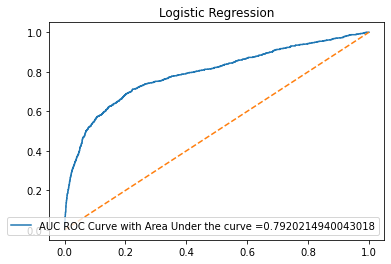

In [355]:
y_pred_proba = LR_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title('Logistic Regression')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

In [356]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y):
    #create a dictionary of all values we want to test
    param_grid = {'criterion':['gini','entropy'], 'max_depth': np.arange(3, 15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [357]:
dtree_grid_search(X_train, y_train)

{'criterion': 'entropy', 'max_depth': 5}

In [358]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3)
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtreepred))

[[7212   57]
 [ 793  174]]


In [359]:
generate_model_report(y_test, dtreepred)

Accuracy =  0.8967945604662457
Precision =  0.7532467532467533
Recall =  0.17993795243019647
F1 Score =  0.2904841402337229


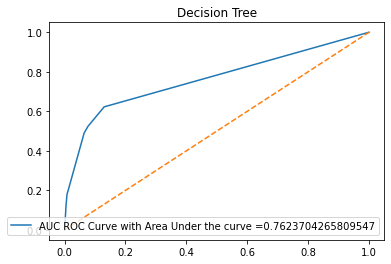

In [360]:
y_pred_proba = dtree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title('Decision Tree')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature: 0, Score: 0.00534
Feature: 1, Score: -0.01895
Feature: 2, Score: 0.02945
Feature: 3, Score: 0.07166
Feature: 4, Score: -0.00003
Feature: 5, Score: 0.00185
Feature: 6, Score: -0.00003
Feature: 7, Score: -0.04785
Feature: 8, Score: -0.07763
Feature: 9, Score: 0.04083
Feature: 10, Score: -0.06784
Feature: 11, Score: 0.01268
Feature: 12, Score: 0.07459
Feature: 13, Score: 0.07688
Feature: 14, Score: -0.20377
Feature: 15, Score: 0.24492
Feature: 16, Score: 0.03596
Feature: 17, Score: -0.23841
Feature: 18, Score: -0.00450


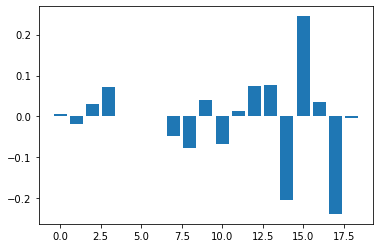

In [361]:
from sklearn.datasets import make_classification

# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,j))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()